In [1]:
%matplotlib inline


Visualizing a probablistic atlas: the default mode in the MSDL atlas
=====================================================================

Visualizing a probablistic atlas requires visualizing the different
maps that compose it.

Here we represent the nodes constituting the default mode network in the
`MSDL atlas
<https://team.inria.fr/parietal/18-2/spatial_patterns/spatial-patterns-in-resting-state/>`_.

The tools that we need to leverage are:

 * :func:`nilearn.image.index_img` to retrieve the various maps composing
   the atlas

 * Adding overlays on an existing brain display, to plot each of these
   maps

Alternatively, :func:`nilearn.plotting.plot_prob_atlas` allows to plot the maps in one step that
with less control over the plot (see below)




Fetching probabilistic atlas - MSDL atlas
-----------------------------------------



In [2]:
from nilearn import datasets

atlas_data = datasets.fetch_atlas_msdl()
atlas_filename = atlas_data.maps

c:\users\asus\miniconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\asus\miniconda3\lib\site-packages\numpy\lib\npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Visualizing a probabilistic atlas with plot_stat_map and add_overlay object
---------------------------------------------------------------------------



c:\users\asus\miniconda3\lib\site-packages\numpy\ma\core.py:2788: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


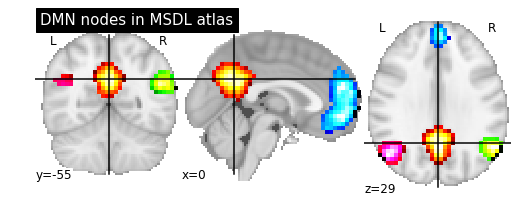

In [3]:
from nilearn import plotting, image

# First plot the map for the PCC: index 4 in the atlas
display = plotting.plot_stat_map(image.index_img(atlas_filename, 4),
                                 colorbar=False,
                                 title="DMN nodes in MSDL atlas")

# Now add as an overlay the maps for the ACC and the left and right
# parietal nodes
display.add_overlay(image.index_img(atlas_filename, 5),
                    cmap=plotting.cm.black_blue)
display.add_overlay(image.index_img(atlas_filename, 6),
                    cmap=plotting.cm.black_green)
display.add_overlay(image.index_img(atlas_filename, 3),
                    cmap=plotting.cm.black_pink)

plotting.show()

Visualizing a probablistic atlas with plot_prob_atlas
=====================================================

Alternatively, we can create a new 4D-image by selecting the 3rd, 4th, 5th and 6th (zero-based) probabilistic map from atlas
via :func:`nilearn.image.index_img` and use :func:`nilearn.plotting.plot_prob_atlas` (added in version 0.2)
to plot the selected nodes in one step.

Unlike :func:`nilearn.plotting.plot_stat_map` this works with 4D images



In [4]:
dmn_nodes = image.index_img(atlas_filename, [3, 4, 5, 6])
# Note that dmn_node is now a 4D image
print(dmn_nodes.shape)

(40, 48, 35, 4)


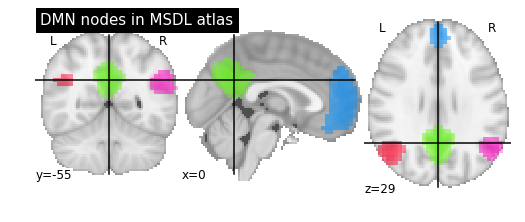

In [5]:
display = plotting.plot_prob_atlas(dmn_nodes,
                                   cut_coords=(0, -55, 29),
                                   title="DMN nodes in MSDL atlas")
plotting.show()